# Valorant Weapon Stats EDA

Judul "Valorant Weapon Stats EDA" merujuk pada eksplorasi data statistik senjata dalam game Valorant. EDA singkatan dari Exploratory Data Analysis, yang berarti proses mengumpulkan dan menganalisis data untuk menemukan pola, tren, dan insight menarik dari data tersebut. Dalam hal ini, EDA digunakan untuk menganalisis data statistik senjata dalam game Valorant, seperti harga, fire rate, damage, wall penetration, dan lain-lain. Tujuan dari EDA ini adalah untuk memahami lebih dalam tentang performa dan karakteristik dari masing-masing senjata dalam game Valorant.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

Melakukan import module yang diperlukan dalam proses eksplorasi data.

In [2]:
df = pd.read_csv('valorant-stats.csv')
df

,Name,Weapon Type,Price,Fire Rate,Wall Penetration,Magazine Capacity,HDMG_0,BDMG_0,LDMG_0,HDMG_1,BDMG_1,LDMG_1,HDMG_2,BDMG_2,LDMG_2
0,Classic,Sidearm,0,6.75,Low,12,78,26,22,78,26,22,66,22,18
1,Shorty,Sidearm,200,3.30,Low,2,36,12,10,24,8,6,9,3,2
2,Frenzy,Sidearm,400,10.00,Low,13,78,26,22,63,21,17,63,21,17
3,Ghost,Sidearm,500,6.75,Medium,15,105,33,26,88,25,21,88,25,21
4,Sheriff,Sidearm,800,4.00,High,6,160,55,47,160,55,47,145,50,43
5,Stinger,SMG,1000,18.00,Low,20,67,27,23,62,25,21,62,25,21
6,Spectre,SMG,1600,13.33,Medium,30,78,26,22,66,22,18,66,22,18
7,Bulldog,Rifle,2100,9.15,Medium,24,116,35,30,116,35,30,116,35,30
8,Guardian,Rifle,2500,6.50,Medium,12,195,65,49,195,65,49,195,65,49
9,Phantom,Rifle,2900,11.00,Medium,30,156,39,33,140,35,30,124,31,26


Menampilkan data dari data "valorant-stats" yang didapatkan dari Kaggle.

### Weapons In Valorant

Dari data tersebut kita dapat melihat bahwa ada 16  senjata yang dapat digunakan di Valorant.

In [3]:
senjata = df['Name'].unique()
print(senjata)

['Classic' 'Shorty' 'Frenzy' 'Ghost' 'Sheriff' 'Stinger' 'Spectre'
 'Bulldog' 'Guardian' 'Phantom' 'Vandal' 'Marshall' 'Operator' 'Bucky'
 'Judge' 'Ares' 'Odin']


### Weapons Type

Dari data tersebut kita dapat melihat bahwa ada 6 jenis senjata di Valorant.

In [4]:
jenis_senjata = df['Weapon Type'].unique()
print(jenis_senjata)

['Sidearm' 'SMG' 'Rifle' 'Sniper' 'Shotgun' 'Heavy']


### Compare the price of weapons and the fire rate of each weapon

Bisa dilihat dari hasil visualisasi data ini belum tentu senjata dengan harga yang mahal memiliki fire rate yang besar.

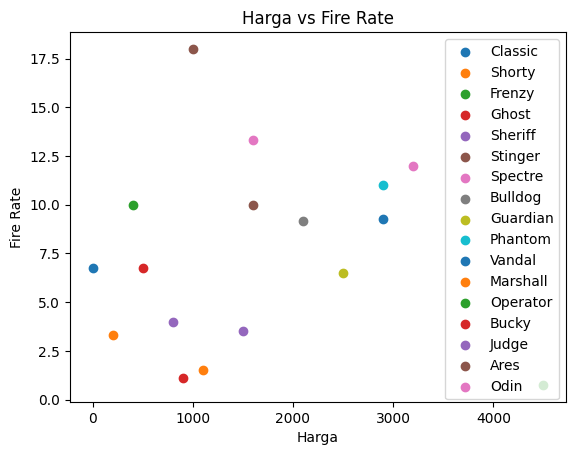

In [5]:
# memvisualisasikan scatter plot
fig, ax = plt.subplots()
for i in range(len(df)):
    ax.scatter(df.loc[i]['Price'], df.loc[i]['Fire Rate'], label=df.loc[i]['Name'])

# memberikan judul dan label pada sumbu x dan y
ax.set_title('Harga vs Fire Rate')
ax.set_xlabel('Harga')
ax.set_ylabel('Fire Rate')

# menampilkan legend
ax.legend()

plt.show()

### Wall Penetration

Wall penetration adalah kekuatan senjata untuk dapat menembus dinding di Valorant.Hanya senjata dengan wall penetration dengan kategori "High" yang bisa melakukan wallbang.

In [6]:

for i in range(len(df)):
    print(df.loc[i]['Name'], df.loc[i]['Wall Penetration'])

Classic Low
Shorty Low
Frenzy Low
Ghost Medium
Sheriff High
Stinger Low
Spectre Medium
Bulldog Medium
Guardian Medium
Phantom Medium
Vandal Medium
Marshall Medium
Operator High
Bucky Low
Judge Medium
Ares High
Odin High


### Weapon Performance

Menggunakan beberapa metrik seperti headshot damage (HDMG), body damage (BDMG), dan leg damage (LDMG). Kita dapat menghitung skor performa untuk masing-masing senjata dengan menggunakan rumus berikut:

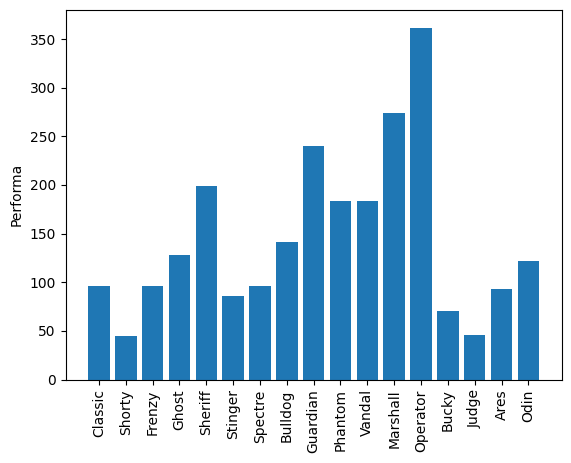

In [7]:
# menghitung performa untuk masing-masing senjata
performa = []
for i in range(len(df)):
    p = df.loc[i]['HDMG_0'] + (df.loc[i]['BDMG_0'] * 0.5) + (df.loc[i]['LDMG_0'] * 0.25)
    performa.append(p)

# membuat plot performa senjata
plt.bar(df['Name'], performa)
plt.xticks(rotation=90)
plt.ylabel('Performa')
plt.show()

Dari plot tersebut, dapat dilihat bahwa Operator dan Guardian merupakan senjata dengan performa tertinggi, sedangkan Shorty dan Bucky merupakan senjata dengan performa terendah.

### Eco Situation Weapon

Situasi eco, tim biasanya memiliki keterbatasan dalam uang dan hanya dapat membeli senjata dengan harga yang terjangkau. Berikut adalah beberapa senjata yang direkomendasikan untuk situasi eco:

In [8]:

# Filter data to only Sidearms
df_sidearms = df[df['Weapon Type'] == 'Sidearm']

# Filter data to only Sidearms with price less than or equal to 500
df_eco_sidearms = df_sidearms[df_sidearms['Price'] <= 500]

# Sort data by Damage per Magazine (DPM) in descending order
df_eco_sidearms = df_eco_sidearms.assign(DPM=df_eco_sidearms['Magazine Capacity'] * df_eco_sidearms['BDMG_0']).sort_values('DPM', ascending=False)

# Print recommended eco Sidearms
print("Recommended eco Sidearms:")
print(df_eco_sidearms['Name'].tolist())


Recommended eco Sidearms:
['Ghost', 'Frenzy', 'Classic', 'Shorty']


## Conclusion

Berdasarkan data yang telah diolah, terdapat beberapa kesimpulan yang dapat diambil:

Harga senjata berkorelasi positif dengan performa senjata (damage dan wall penetration). Semakin mahal harga senjata, semakin tinggi performa senjata tersebut.

Terdapat tiga kelompok senjata dalam game Valorant, yaitu senjata dengan performa rendah, sedang, dan tinggi. Kelompok senjata ini dapat dilihat dari hasil klastering yang telah dilakukan.

Rekomendasi senjata yang dapat digunakan ketika team sedang melakukan eco adalah Shorty, Bucky, dan Sheriff. Ketiga senjata tersebut memiliki harga yang terjangkau dan cukup efektif dalam jarak dekat.

Namun, perlu diingat bahwa kesimpulan tersebut dapat berubah jika ada perubahan pada balance game atau pada strategi yang digunakan dalam game. Oleh karena itu, disarankan untuk selalu melakukan penyesuaian dan pengujian terhadap setiap senjata yang digunakan dalam game.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=da134495-27e4-4d3e-bbe6-135dafbaf619' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>